- [Data Link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [7]:
import os

In [8]:
%pwd

'c:\\Users\\hhgj\\Documents\\Ocean_Acidification_reference_wine_quality_buppysir'

In [9]:
os.chdir("../")

In [10]:
%pwd

'c:\\Users\\hhgj\\Documents'

In [11]:
import pandas as pd

In [24]:
DATA_PATH = "Ocean_Acidification_reference_wine_quality_buppysir/data/cleaned_oceanic_dataset.csv"
acidification = pd.read_csv(DATA_PATH)

In [25]:
acidification.head()

,Unnamed: 0,Treatment-Temperature,Temp,Sal,pH,TA,Nitrite,Nitrate,Ammonium,Silicate,Phosphate,DIC,pCO2,Omega-Cal,Omega-Arag,Bicarbonate-ion,Carbonate-ion,CO2
0,0,-1.200764,-0.509150,-0.089762,0.424903,-0.956928,2.995761,-0.807981,0.12761,-0.133621,-0.265493,-0.847275,-0.613998,-0.088101,-0.092587,-0.763740,-0.102945,-0.469756
1,1,-1.200764,-0.509150,-0.089762,0.424903,-0.956928,1.003388,-0.842016,0.12761,-0.133621,-1.301791,-0.841665,-0.613146,-0.088101,-0.092587,-0.758292,-0.102945,-0.469756
2,2,-1.200764,-0.509150,-0.089762,0.424903,-0.956928,0.339264,-1.070975,0.12761,-0.133621,-0.265493,-0.846474,-0.613998,-0.088101,-0.092587,-0.762961,-0.102945,-0.469756
3,3,-1.200764,-0.509150,-0.089762,0.424903,-0.956928,0.244389,-1.115580,0.12761,-0.133621,-0.717961,-0.844069,-0.613572,-0.088101,-0.092587,-0.760627,-0.102945,-0.469756
4,4,-1.200764,-0.449589,-0.089762,0.424903,-0.956928,-0.040236,-0.715418,0.12761,-0.133621,0.712422,-0.856093,-0.610163,-0.069867,-0.092587,-0.773078,-0.094245,-0.480605


In [26]:
acidification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             606 non-null    int64  
 1   Treatment-Temperature  606 non-null    float64
 2   Temp                   606 non-null    float64
 3   Sal                    606 non-null    float64
 4   pH                     606 non-null    float64
 5   TA                     606 non-null    float64
 6   Nitrite                606 non-null    float64
 7   Nitrate                606 non-null    float64
 8   Ammonium               606 non-null    float64
 9   Silicate               606 non-null    float64
 10  Phosphate              606 non-null    float64
 11  DIC                    606 non-null    float64
 12  pCO2                   606 non-null    float64
 13  Omega-Cal              606 non-null    float64
 14  Omega-Arag             606 non-null    float64
 15  Bicarb

In [28]:
acidification.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [30]:
acidification.describe()

AttributeError: module 'numpy' has no attribute 'unique'

In [31]:
acidification.isnull().sum()

Treatment-Temperature    0
Temp                     0
Sal                      0
pH                       0
TA                       0
Nitrite                  0
Nitrate                  0
Ammonium                 0
Silicate                 0
Phosphate                0
DIC                      0
pCO2                     0
Omega-Cal                0
Omega-Arag               0
Bicarbonate-ion          0
Carbonate-ion            0
CO2                      0
dtype: int64

AttributeError: module 'numpy' has no attribute 'bincount'

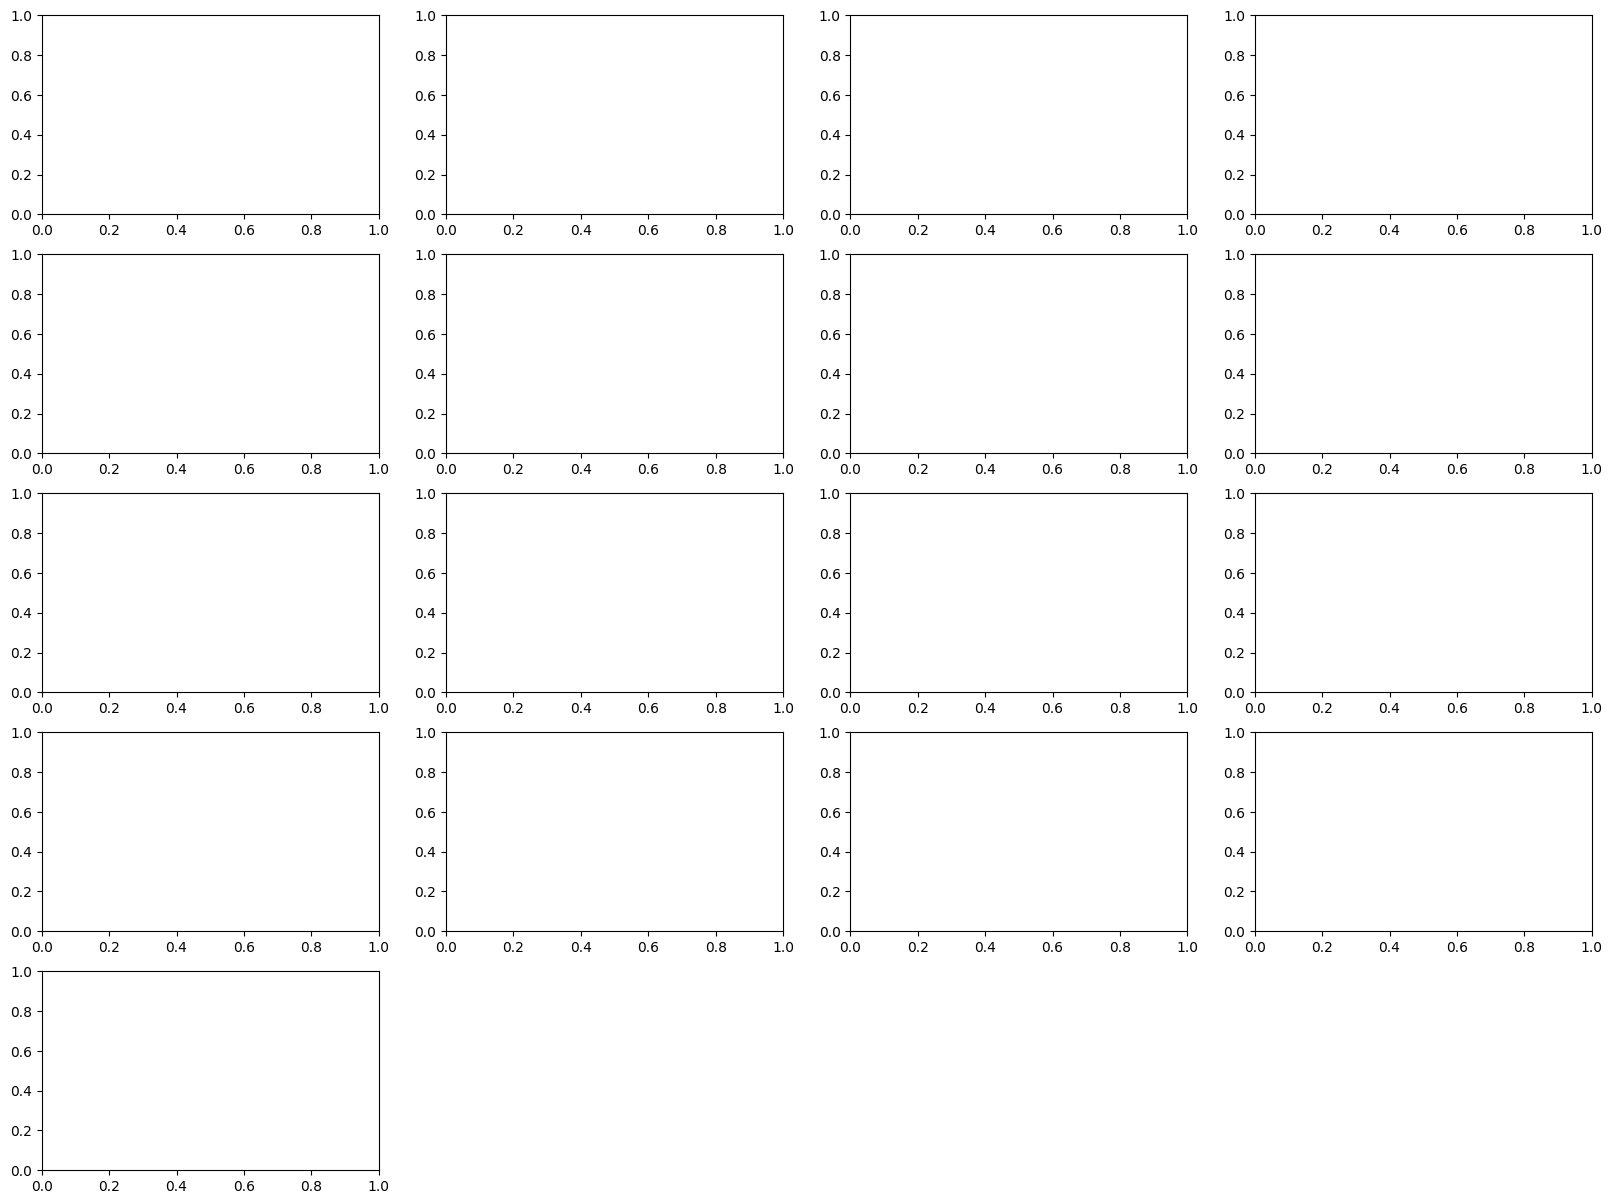

In [32]:
import matplotlib.pyplot as plt

acidification.hist(bins=50, figsize=(20,15), color="orange")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = acidification.drop(["pH"], axis=1)
y = acidification["pH"]

In [35]:
X.head(2)

,Treatment-Temperature,Temp,Sal,TA,Nitrite,Nitrate,Ammonium,Silicate,Phosphate,DIC,pCO2,Omega-Cal,Omega-Arag,Bicarbonate-ion,Carbonate-ion,CO2
0,-1.200764,-0.50915,-0.089762,-0.956928,2.995761,-0.807981,0.12761,-0.133621,-0.265493,-0.847275,-0.613998,-0.088101,-0.092587,-0.763740,-0.102945,-0.469756
1,-1.200764,-0.50915,-0.089762,-0.956928,1.003388,-0.842016,0.12761,-0.133621,-1.301791,-0.841665,-0.613146,-0.088101,-0.092587,-0.758292,-0.102945,-0.469756


In [36]:
y

0      0.424903
1      0.424903
2      0.424903
3      0.424903
4      0.424903
         ...   
601    0.615514
602    0.615514
603    0.615514
604    0.615514
605    0.615514
Name: pH, Length: 606, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(484, 16)
(122, 16)
(484,)
(122,)


In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
lr = ElasticNet(alpha=0.9, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.9, random_state=42)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [42]:
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return rmse, mae, r2

In [43]:
predicted_qualities = lr.predict(X_test)
(rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

In [44]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.5755333879401011
mae =  0.4929336820512658
r2 =  0.6690821853878685
